## DATA 620 Final Project
#### Amazon Software Reviews

Benson Toi, Noah Collin, Ahmed Elsaeyed

Data source:
https://nijianmo.github.io/amazon/index.html

This is a sentiment analyisis of Amazon reviews of software from 1998-2015

In [40]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import random
from tqdm import tqdm, trange #for progress bars of computation in Jupyter, see https://www.youtube.com/watch?v=n4E7of9BINo

In [41]:
from transformers import pipeline

In [42]:
print("Pandas version: {}".format(pd.__version__))
#print("datetime version: {}".format(datetime.__version__))
print("Seaborn version: {}".format(sns.__version__))

Pandas version: 1.4.2
Seaborn version: 0.11.2


In [43]:
df = pd.read_json('Software.json',  lines=True) #lines equal true because the CSV has \n chars

In [44]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [45]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN


In [46]:
def HumanTime (x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

HumanTime(df['unixReviewTime'][0])

'2014-03-11 00:00:00'

In [47]:
df['ReviewTime']= tqdm(df.unixReviewTime.apply(HumanTime))


100%|██████████| 459436/459436 [00:00<00:00, 4609762.13it/s]


In [48]:
df['ReviewTime'].head(3)

0    2014-03-11 00:00:00
1    2014-02-23 00:00:00
2    2014-02-17 00:00:00
Name: ReviewTime, dtype: object

In [49]:
df['Year'] = df['ReviewTime'].apply(lambda x: int(re.findall ("\d+", x)[0]))

In [50]:
df['Year'].value_counts().sort_index()

1998        1
1999      125
2000     1326
2001     2833
2002     4144
2003     4681
2004     4685
2005     6724
2006     8486
2007    13962
2008    17735
2009    20000
2010    15185
2011    17061
2012    22894
2013    46663
2014    77348
2015    86324
2016    66786
2017    29350
2018    13123
Name: Year, dtype: int64

In [51]:
df.reviewText.describe()

count     459370
unique    421432
top         good
freq         811
Name: reviewText, dtype: object

In [52]:
df.summary.describe()

count         459380
unique        286888
top       Five Stars
freq           51188
Name: summary, dtype: object

In [53]:
df.overall.value_counts().sort_index()

1    102548
2     31445
3     39395
4     73596
5    212452
Name: overall, dtype: int64

In [54]:
df.overall.describe() #Review Scores

count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [55]:
df['overall'].median()

4.0

In [56]:
df['style'].describe()

count                            234401
unique                              423
top       {'Platform:': ' PC Download'}
freq                              50647
Name: style, dtype: object

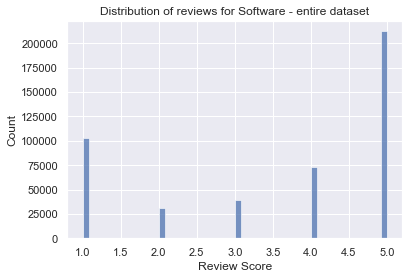

In [57]:
sns.set(style="darkgrid")
sns.histplot(df['overall']).set(title = "Distribution of reviews for Software - entire dataset",
                                        xlabel = 'Review Score')
plt.show()

Mostly five-star reviews.

In [58]:
oneStarReviews = df[df['overall']==1]
oneStarReviews.shape

(102548, 14)

In [59]:
twoStarReviews = df[df['overall']==2]
threeStarReviews = df[df['overall']==3]
fourStarReviews = df[df['overall']==4]
fiveStarReviews = df[df['overall']==5]

In [60]:
random.seed(6174)
#Kaprekar’s constant

In [61]:
randomSelection = random.choices(range(len(df)), k=1000) 
# we're going to work with 1000 reviews I suppose

In [62]:
df1000 = df.loc[randomSelection,]
df1000.head(4)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007
65569,4,True,"06 16, 2012",A24K4130JIZCC6,B0014X2UAK,NaN,iTanz,I ordered this product with expedited shipping...,iWork Rox,1339804800,NaN,NaN,2012-06-16 00:00:00,2012


In [63]:
classifier = pipeline("sentiment-analysis")
currentClassifierType = "sentiment-analysis"
#This cell will download models the first time it's run.  
#These are large so don't use a metered connection if possible.
#default model used, link here:
#https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [64]:
sentence = "The apple is icky."
classifier(sentence)

[{'label': 'NEGATIVE', 'score': 0.9996140599250793}]

In [65]:
def hugFace(x):
    if(currentClassifierType != "sentiment-analysis"):
        print("You're using the wrong classifier!  Run the notebook in order.")
        return None
    try:
        return classifier(x)
    except:
        return"UNKNOWN"

In [66]:

df1000['distilbert-base-uncased sentiment-analysis'] = tqdm(
    df1000['reviewText'].apply(hugFace)
)
#This cell will take several minutes to run

Token indices sequence length is longer than the specified maximum sequence length for this model (716 > 512). Running this sequence through the model will result in indexing errors
100%|██████████| 1000/1000 [00:00<?, ?it/s]


In [67]:
df1000

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,ReviewTime,Year,distilbert-base-uncased sentiment-analysis
319057,1,False,"11 19, 2016",A2WULF7HX5QRW6,B01019T6O0,{'Style:': ' USB Flash Drive'},fazil,Windows 10 updates all the time! Causing my co...,Garbage!,1479513600,NaN,NaN,2016-11-19 00:00:00,2016,"[{'label': 'NEGATIVE', 'score': 0.999703466892..."
351090,5,True,"12 30, 2015",A2LDZGQKQTBLKE,B01637REAM,{'Platform:': ' PC Download'},joe d,I have been using turbo tax from the start way...,Still The Best,1451433600,NaN,NaN,2015-12-30 00:00:00,2015,"[{'label': 'NEGATIVE', 'score': 0.993547618389..."
391520,1,False,"06 29, 2007",AOWZQAE1TO0IA,B000AMPJPY,NaN,Science Minded,Very Buggy software that needs some rewriting....,Don't expect any help,1183075200,NaN,NaN,2007-06-29 00:00:00,2007,"[{'label': 'NEGATIVE', 'score': 0.999778926372..."
65569,4,True,"06 16, 2012",A24K4130JIZCC6,B0014X2UAK,NaN,iTanz,I ordered this product with expedited shipping...,iWork Rox,1339804800,NaN,NaN,2012-06-16 00:00:00,2012,"[{'label': 'POSITIVE', 'score': 0.971159636974..."
192359,1,False,"02 10, 2014",ABVYGB2TKBO8F,B00E6LJBUO,NaN,J. Donaldson,Update Nov 2016\nI continue to wonder why Intu...,Intuit doesn't listen to it's customers.,1391990400,3,NaN,2014-02-10 00:00:00,2014,"[{'label': 'NEGATIVE', 'score': 0.999666571617..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432238,1,True,"09 2, 2014",ATYTMVDLMV3SW,B009YYZJDQ,NaN,R. Stern,I have used Symantec products for many years; ...,Avoid This product,1409616000,NaN,NaN,2014-09-02 00:00:00,2014,"[{'label': 'NEGATIVE', 'score': 0.998853802680..."
299367,5,True,"01 28, 2015",A31DN6H8LGI1LK,B00PJPI6P2,{'Platform:': ' PC Disc'},Jimmy D,I did 3 returns as soon as I got it. It was g...,A really great bundle of options included.,1422403200,NaN,NaN,2015-01-28 00:00:00,2015,"[{'label': 'POSITIVE', 'score': 0.999598443508..."
209978,5,True,"02 19, 2015",A1USN54OPO3UE0,B00EZPXYP4,{'Platform:': ' PC Disc'},James E. Amos,Great product as always. Continues to save my ...,Norton 360,1424304000,NaN,NaN,2015-02-19 00:00:00,2015,"[{'label': 'POSITIVE', 'score': 0.999535322189..."
72222,5,False,"08 6, 2009",AKNAB82ICFA31,B001CJQGM4,{'Format:': ' DVD-ROM'},sgray,It has been great for music ripping. It does ...,Simple solution,1249516800,NaN,NaN,2009-08-06 00:00:00,2009,"[{'label': 'POSITIVE', 'score': 0.988519370555..."


In [68]:
classifier = pipeline("zero-shot-classification")

currentClassifierType = "zero-shot-classification"
type(classifier)
#This cell involves a 1.5+ GB download

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


transformers.pipelines.zero_shot_classification.ZeroShotClassificationPipeline

In [69]:
classifier(
    "I just ate great Spanish food with my foes.",
    candidate_labels=["cuisine", "friendship","nihilism"],
)

{'sequence': 'I just ate great Spanish food with my foes.',
 'labels': ['cuisine', 'friendship', 'nihilism'],
 'scores': [0.9875638484954834, 0.0067010740749537945, 0.005735104903578758]}

In [70]:
def performZeroShotAnalysis(x, labs = ['endorsement','disapproval']):
    if (currentClassifierType != "zero-shot-classification"):
        print("You aren't using the right classifer now.  Rerun the cell with the ZeroShot.")
        return None
    try:
        return classifier (x, candidate_labels = labs)
    except:
        return "UNKNOWN"

In [71]:
performZeroShotAnalysis('I wish I hadn\'t bought this product.')
#So we can use this pipeline to to classify reviews 

{'sequence': "I wish I hadn't bought this product.",
 'labels': ['disapproval', 'endorsement'],
 'scores': [0.9734046459197998, 0.026595350354909897]}

In [ ]:
df1000['zero shot facebook/bart-large-mnli'] =  tqdm(df1000['reviewText'].apply(performZeroShotAnalysis))

In [ ]:
df1000['zero shot facebook/bart-large-mnli'].values[0:3]
#notice that the labels, "endorsement and dissaproval" change order.  TODO